<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name', 'CPLEXStatus','type']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

8750


In [2]:
X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

In [3]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def custom_activation(x):
    return 99999*1/(1+K.exp(-x))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    
    
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.25))
    

    
    model.add(Dense(1, activation = custom_activation))
    #model.add(Activation(custom_activation, name='SpecialActivation'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

estimator = KerasRegressor(build_fn=make_model, epochs=50, batch_size=128, verbose=1)

history=estimator.fit(X_train,y_train)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


57/57 [==============================] - 1s 3ms/step - loss: 1941355520.0000
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 1560529408.0000
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 1343098752.0000
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 1174593280.0000
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 1047224640.0000
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 963962496.0000
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 919876928.0000
Epoch 8/50
57/57 [==============================] - 0s 3ms/step - loss: 851544704.0000
Epoch 9/50
57/57 [==============================] - 0s 2ms/step - loss: 809048128.0000
Epoch 10/50
57/57 [==============================] - 0s 3ms/step - loss: 746364032.0000
Epoch 11/50
57/57 [==============================] - 0s 3ms/step - loss: 719078912.0000
Epoch 12/50
57/57 [============================

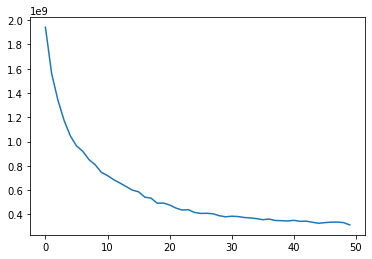

In [5]:
plt.plot(history.history['loss'])

In [6]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
yy = np.array(y_test)
predd = np.array(prediction)
for i in range(10):
  print("real value of y_test: " + str(yy[i]) + " -> the predict: " + str(predd[i]))

12/12 [==============================] - 0s 2ms/step
r_square score:  0.7977948692592566
real value of y_test: 49.108479 -> the predict: 3.7535574e-06
real value of y_test: 62.491741 -> the predict: 0.00048765456
real value of y_test: 29.130211 -> the predict: 6.537459
real value of y_test: 71.601105 -> the predict: 0.0011275271
real value of y_test: 39.851036 -> the predict: 314.12677
real value of y_test: 99999.0 -> the predict: 99958.75
real value of y_test: 262.830231 -> the predict: 856.933
real value of y_test: 48.396175 -> the predict: 205.30138
real value of y_test: 72.413322 -> the predict: 397.66867
real value of y_test: 41.455616 -> the predict: 0.013651517


In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd)) 

RMSE:


16587.122656819774